
# <span style="color:rgb(213,80,0)">matGoFEM: Live Script 01</span>

## RESISTIVITY CROSS\-SECTIONS IN 2\-D AND 3\-D VIEW

This Live Script demonstrates how to visualize resistivity cross\-sections from GoFEM inversion models using geometry preserving slicing in MATLAB.


The workflow is based on two core functions:

1.  **<samp>read_vtu_gofem</samp>**  \- reads the GoFEM VTU (ASCII) model into MATLAB
2. **<samp>plot_cross_section</samp>** \- plots a cross\-section per call

 **IMPORTANT NOTE:** The original GoFEM VTU files are typically compressed (binary). To read them with this lightweight MATLAB reader, **you must export the model in ASCII format using ParaView**:


**<samp>File -> Save Data -> choose VTU -> set Data Mode = ASCII</samp>**

<a name="beginToc"></a>

## Table of Contents
&emsp;[RESISTIVITY CROSS\-SECTIONS IN 2\-D AND 3\-D VIEW](#resistivity-cross-sections-in-2-d-and-3-d-view)

&emsp;[1) Read a GoFEM VTU model (ASCII)](#1-read-a-gofem-vtu-model-ascii-)

&emsp;[2) Global visualization settings (recommended)](#2-global-visualization-settings-recommended-)

&emsp;[Example 1: 2D resistivity cross\-section at x = 0 (yz\-plane)](#example-1-2d-resistivity-cross-section-at-x-0-yz-plane-)

&emsp;[Example 2: Two 3D resistivity cross\-sections (x = 0 and y = 0)](#example-2-two-3d-resistivity-cross-sections-x-0-and-y-0-)

&emsp;[Example 3: 2D horizontal resistivity slice at z = \-1 km](#example-3-2d-horizontal-resistivity-slice-at-z-1-km)

&emsp;[Example 4: Make air/ocean transparent (based on Example 1)](#example-4-make-air-ocean-transparent-based-on-example-1-)

&emsp;[Example 5: 2D resistivity profile between points A and B](#example-5-2d-resistivity-profile-between-points-a-and-b)

<a name="endToc"></a>

**SUMMARY**


In this Live Script I show how to:

-  Read a GoFEM inversion model exported as VTU ASCII.
-  Plot geometry\-preserving cross\-sections in 2D.
-  Append multiple planes in 3D using a shared axes.
-  Improve readability by showing mesh edges subtly.
-  Hide air and ocean cells using simple resistivity thresholds.
-  Extract an A–B profile with a distance axis starting at point A.

**Author**: Cesar Castro


**Institution**: Institute of Geophysics – Czech Academy of Sciences


**Last update**: 08\-Dec\-2025


In [1]:
clear, clc


## 1) Read a GoFEM VTU model (ASCII)

In [2]:
% Select your VTU file
filename = "C:\Users\cesar\OneDrive\GitHub\matGoFEM\data\inv_model_30_ASCII.vtu"

filename = "C:\Users\cesar\OneDrive\GitHub\matGoFEM\data\inv_model_30_ASCII.vtu"

In [3]:
% Or define paths
% path        = 'C:\Users\cesar\OneDrive\GitHub\matGoFEM\data';
% file        = 'inv_model_30_ASCII.vtu';
% filename    = fullfile(path, file);

% Read model
M = read_vtu_gofem(filename);

% Quick sanity check (optional)
disp(M)

       points: [1340704x3 double]
    cellTypes: [167588x1 double]
        cells: [167588x8 double]
    pointData: [1x1 struct]

In [4]:
fieldnames(M)

ans = 4x1 cell
'points'     
'cellTypes'  
'cells'      
'pointData'

In [5]:
fieldnames(M.pointData)

ans = 2x1 cell
'conductivity'
'resistivity'


## 2) Global visualization settings (recommended)

In [6]:
% Resistivity thresholds (Ohm·m)
air   = 1E06;
ocean = 0.3;

% Default colormap range in log10 scale
cLim = [0 4];

% Neutral background color for better contrast
bgGray = [0.5 0.5 0.5];


## Example 1: 2D resistivity cross\-section at x = 0 (yz\-plane)

GOAL:  Plot a geometry\-preserving 2D cross\-section at x = 0.


STEPS:

1.  Call plot\_cross\_section for a single plane.
2. Adjust view limits.
3. Adjust color limits.


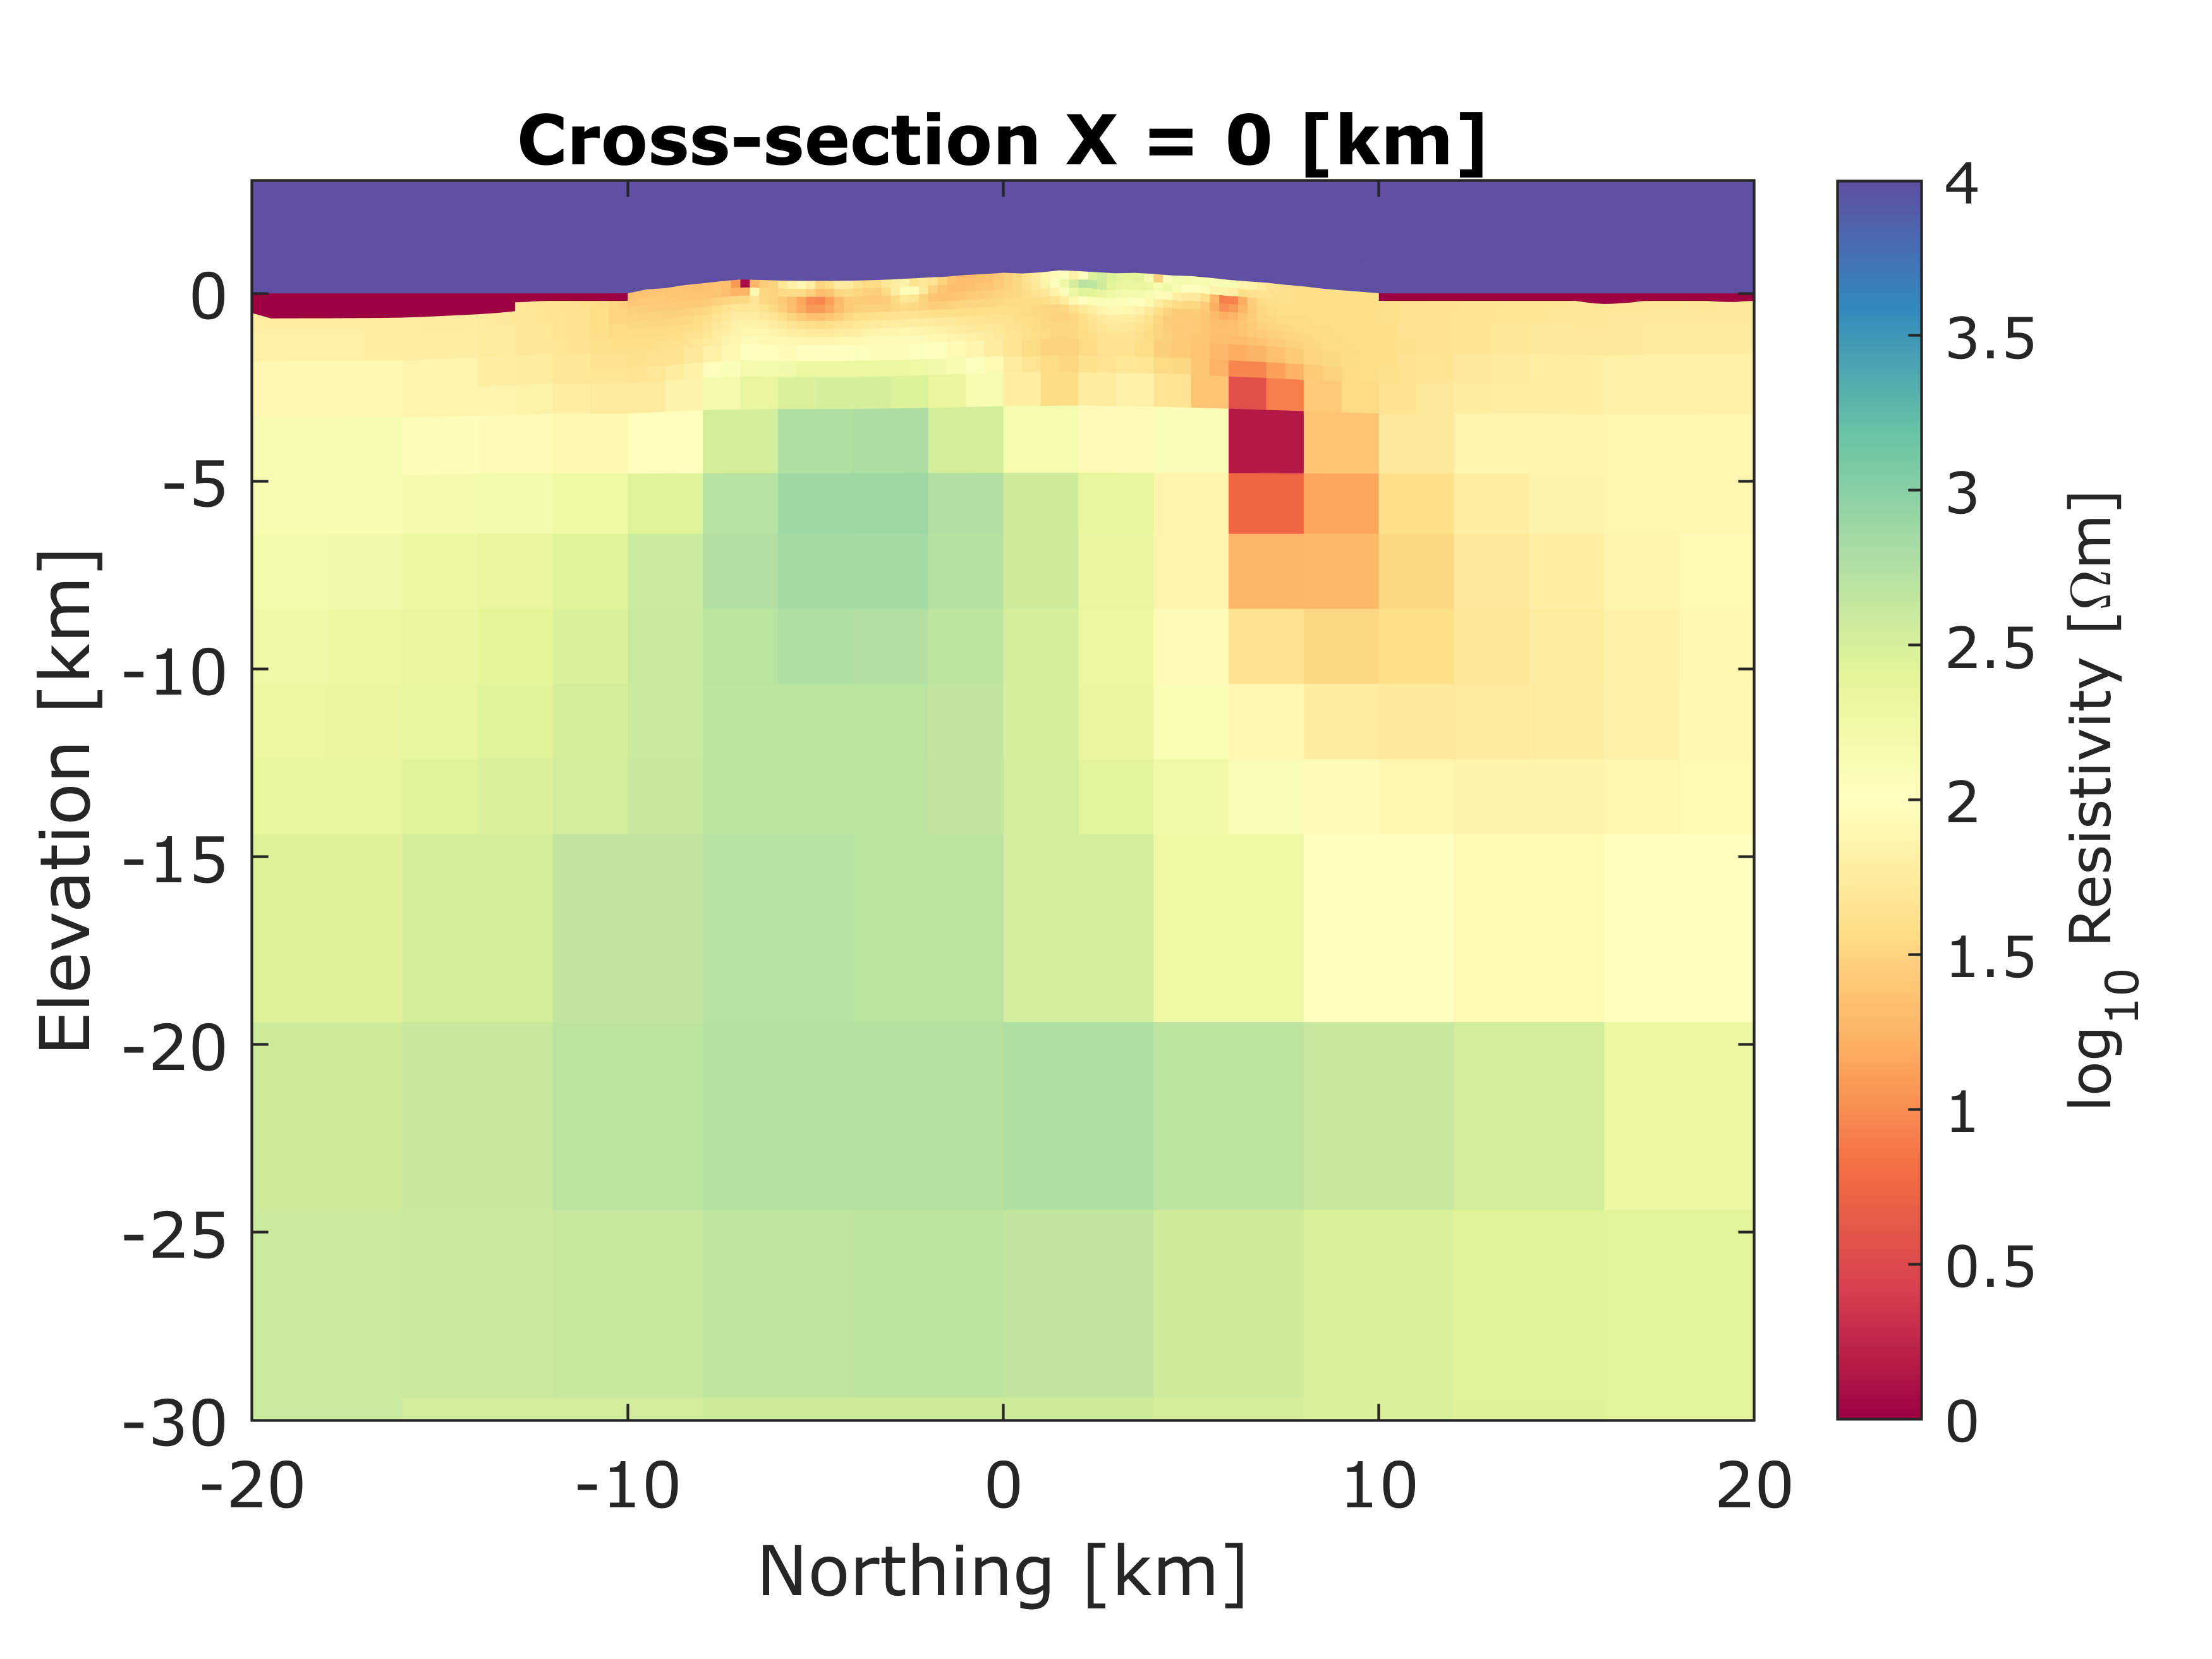

In [7]:
% 1) Plot
ax1 = plot_cross_section(M, 'x', 0);

% 2) Adjust view limits
ax1.XLim = [-20 20];
ax1.YLim = [-30 3];

% 3) Adjust color scale (log10)
clim(ax1, cLim);

## Example 2: Two 3D resistivity cross\-sections (x = 0 and y = 0)

GOAL: Overlay two planes in a single 3D view.


STEPS:

1.  Plot the first plane in 3D and capture its axes.
2. Add the second plane using the same axes.
3. Adjust view limits and appearance.
4. Adjust color limits.


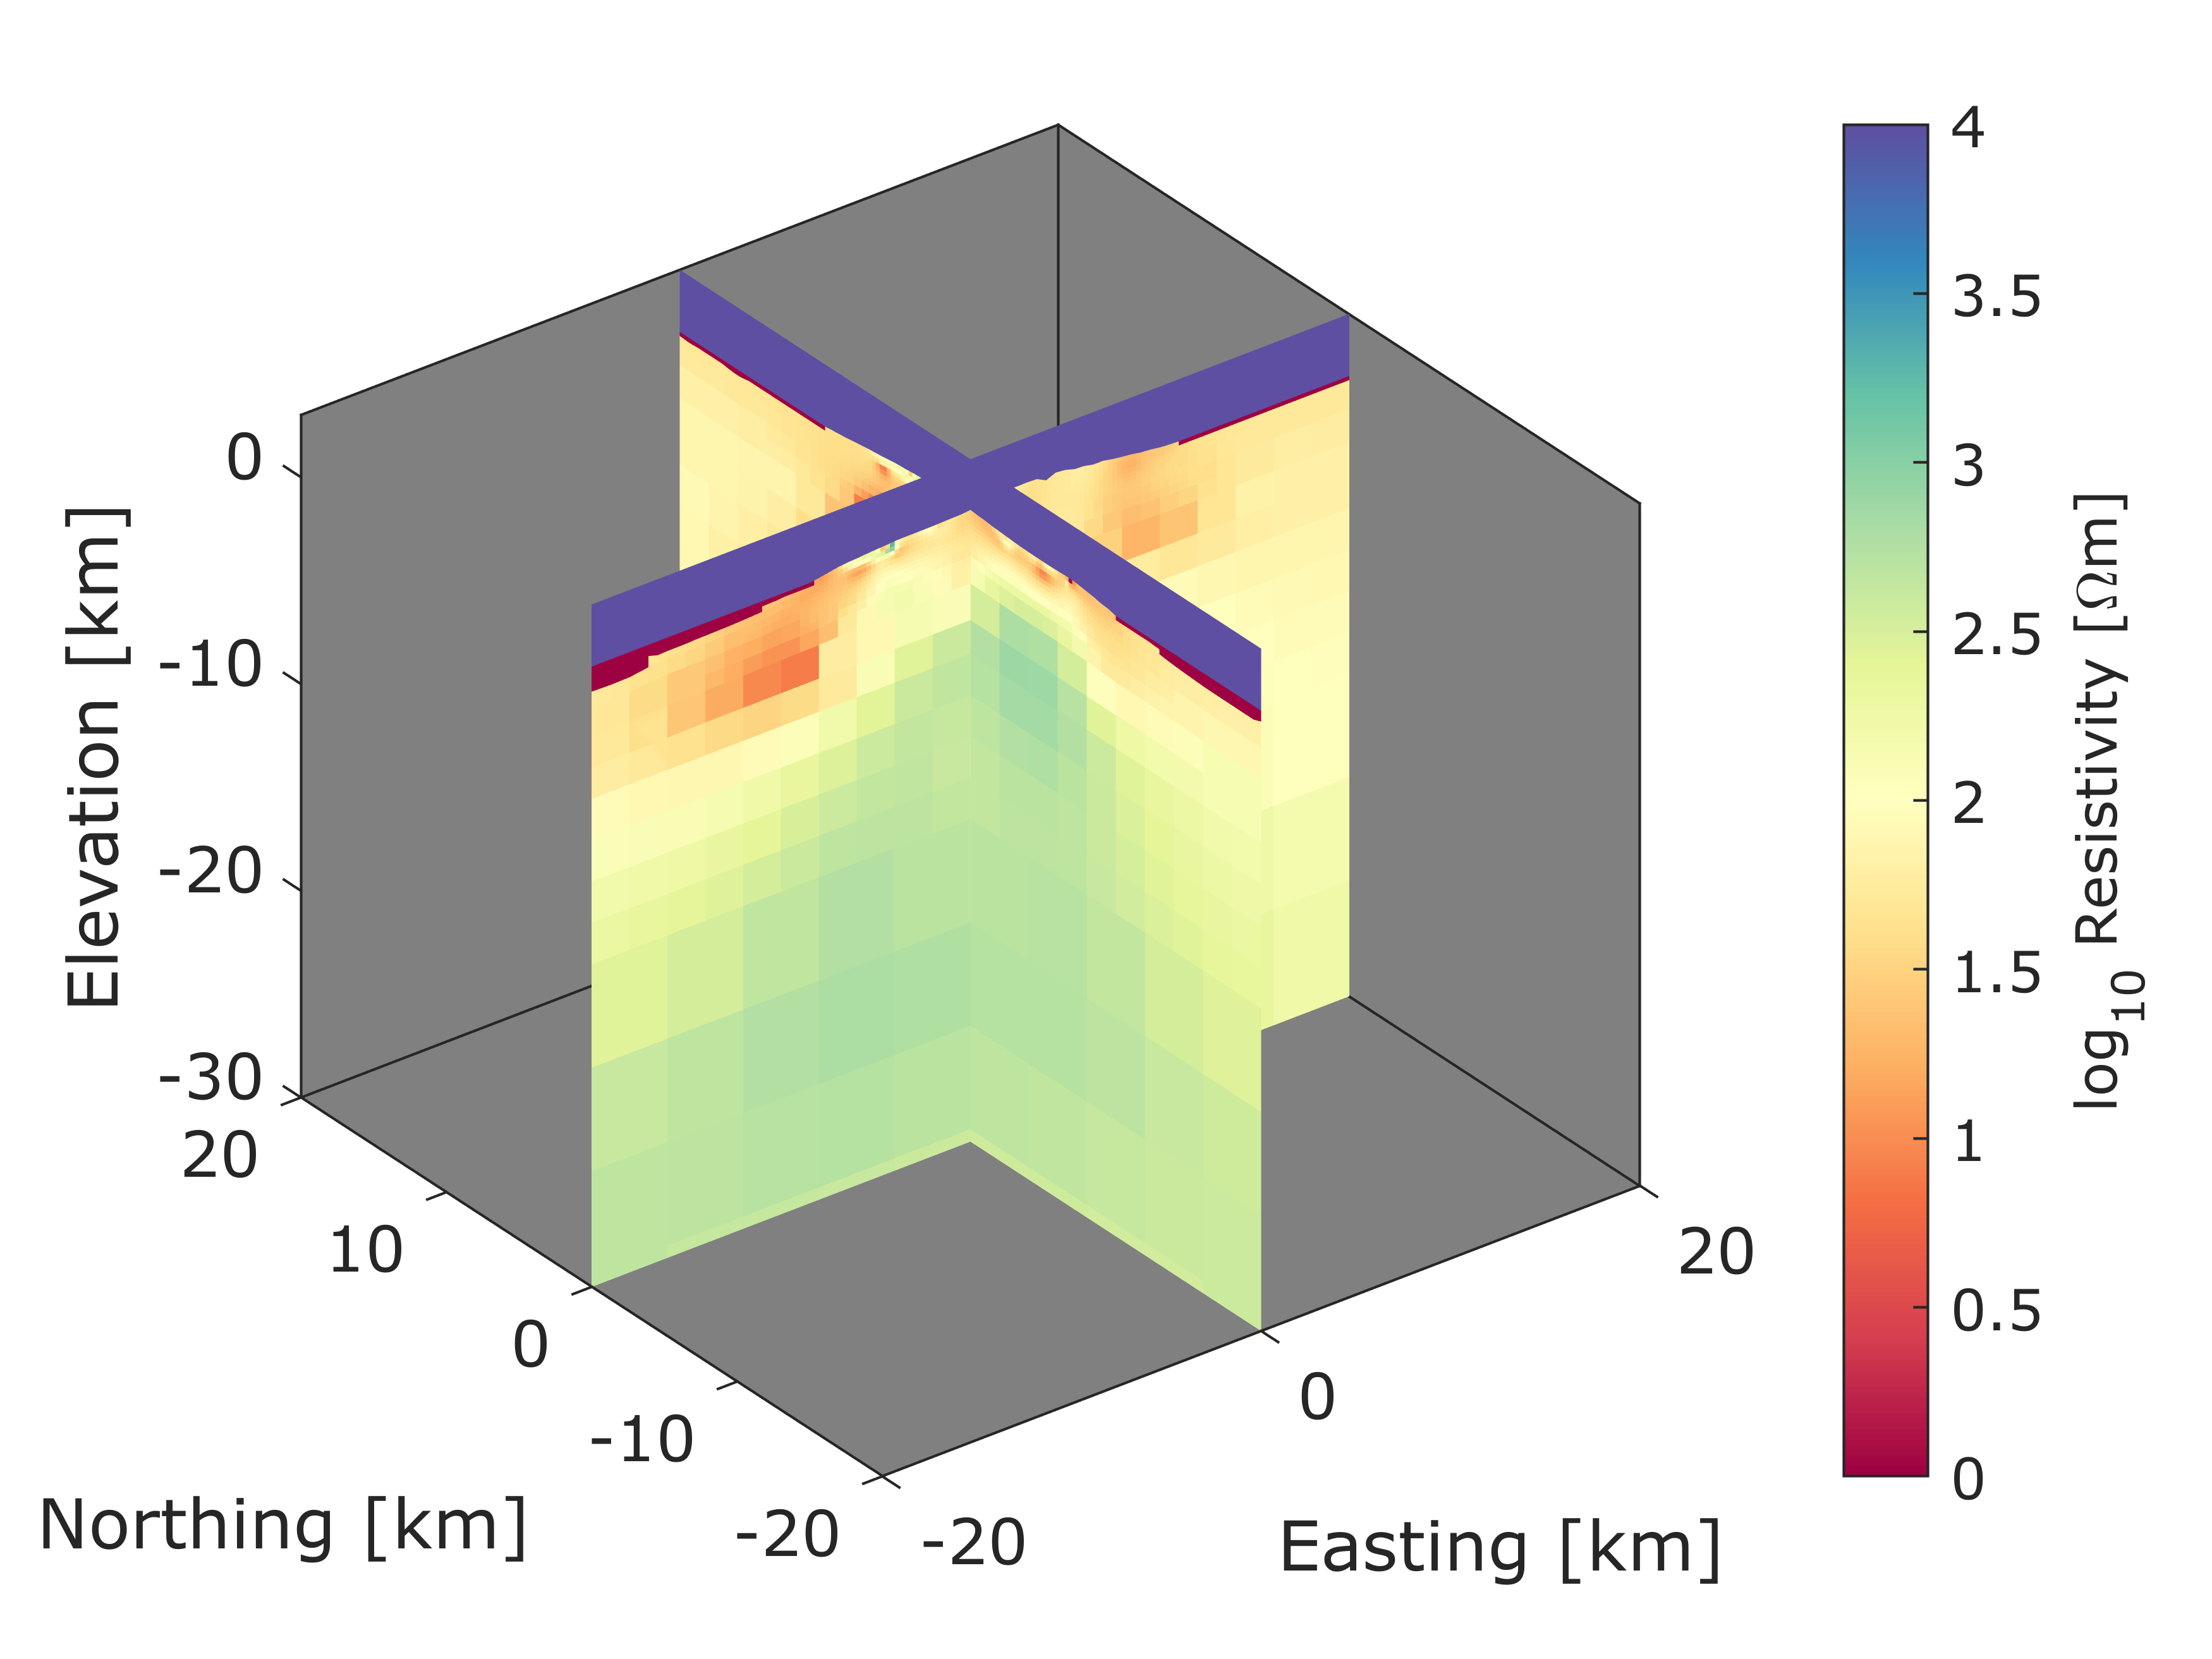

In [8]:
% 1) Plot first plane (3D)
ax2 = plot_cross_section(M, 'x', 0, 'view', '3d');

% 2) Add second plane to the same axes
plot_cross_section(M, 'y', 0, 'view', '3d', 'axes', ax2);

% 3) Adjust view limits
ax2.XLim = [-20 20];
ax2.YLim = [-20 20];
ax2.ZLim = [-30 3];

% 4) Background color
ax2.Color = bgGray;

% 5) Adjust color scale (log10)
clim(ax2, cLim);

## Example 3: 2D horizontal resistivity slice at z = \-1 km

GOAL: Plot a geometry\-preserving horizontal slice at a fixed elevation/depth.


STEPS:

1.  Plot z\-plane.
2. Adjust map limits.
3. Show mesh edges lightly.
4. Adjust color limits.


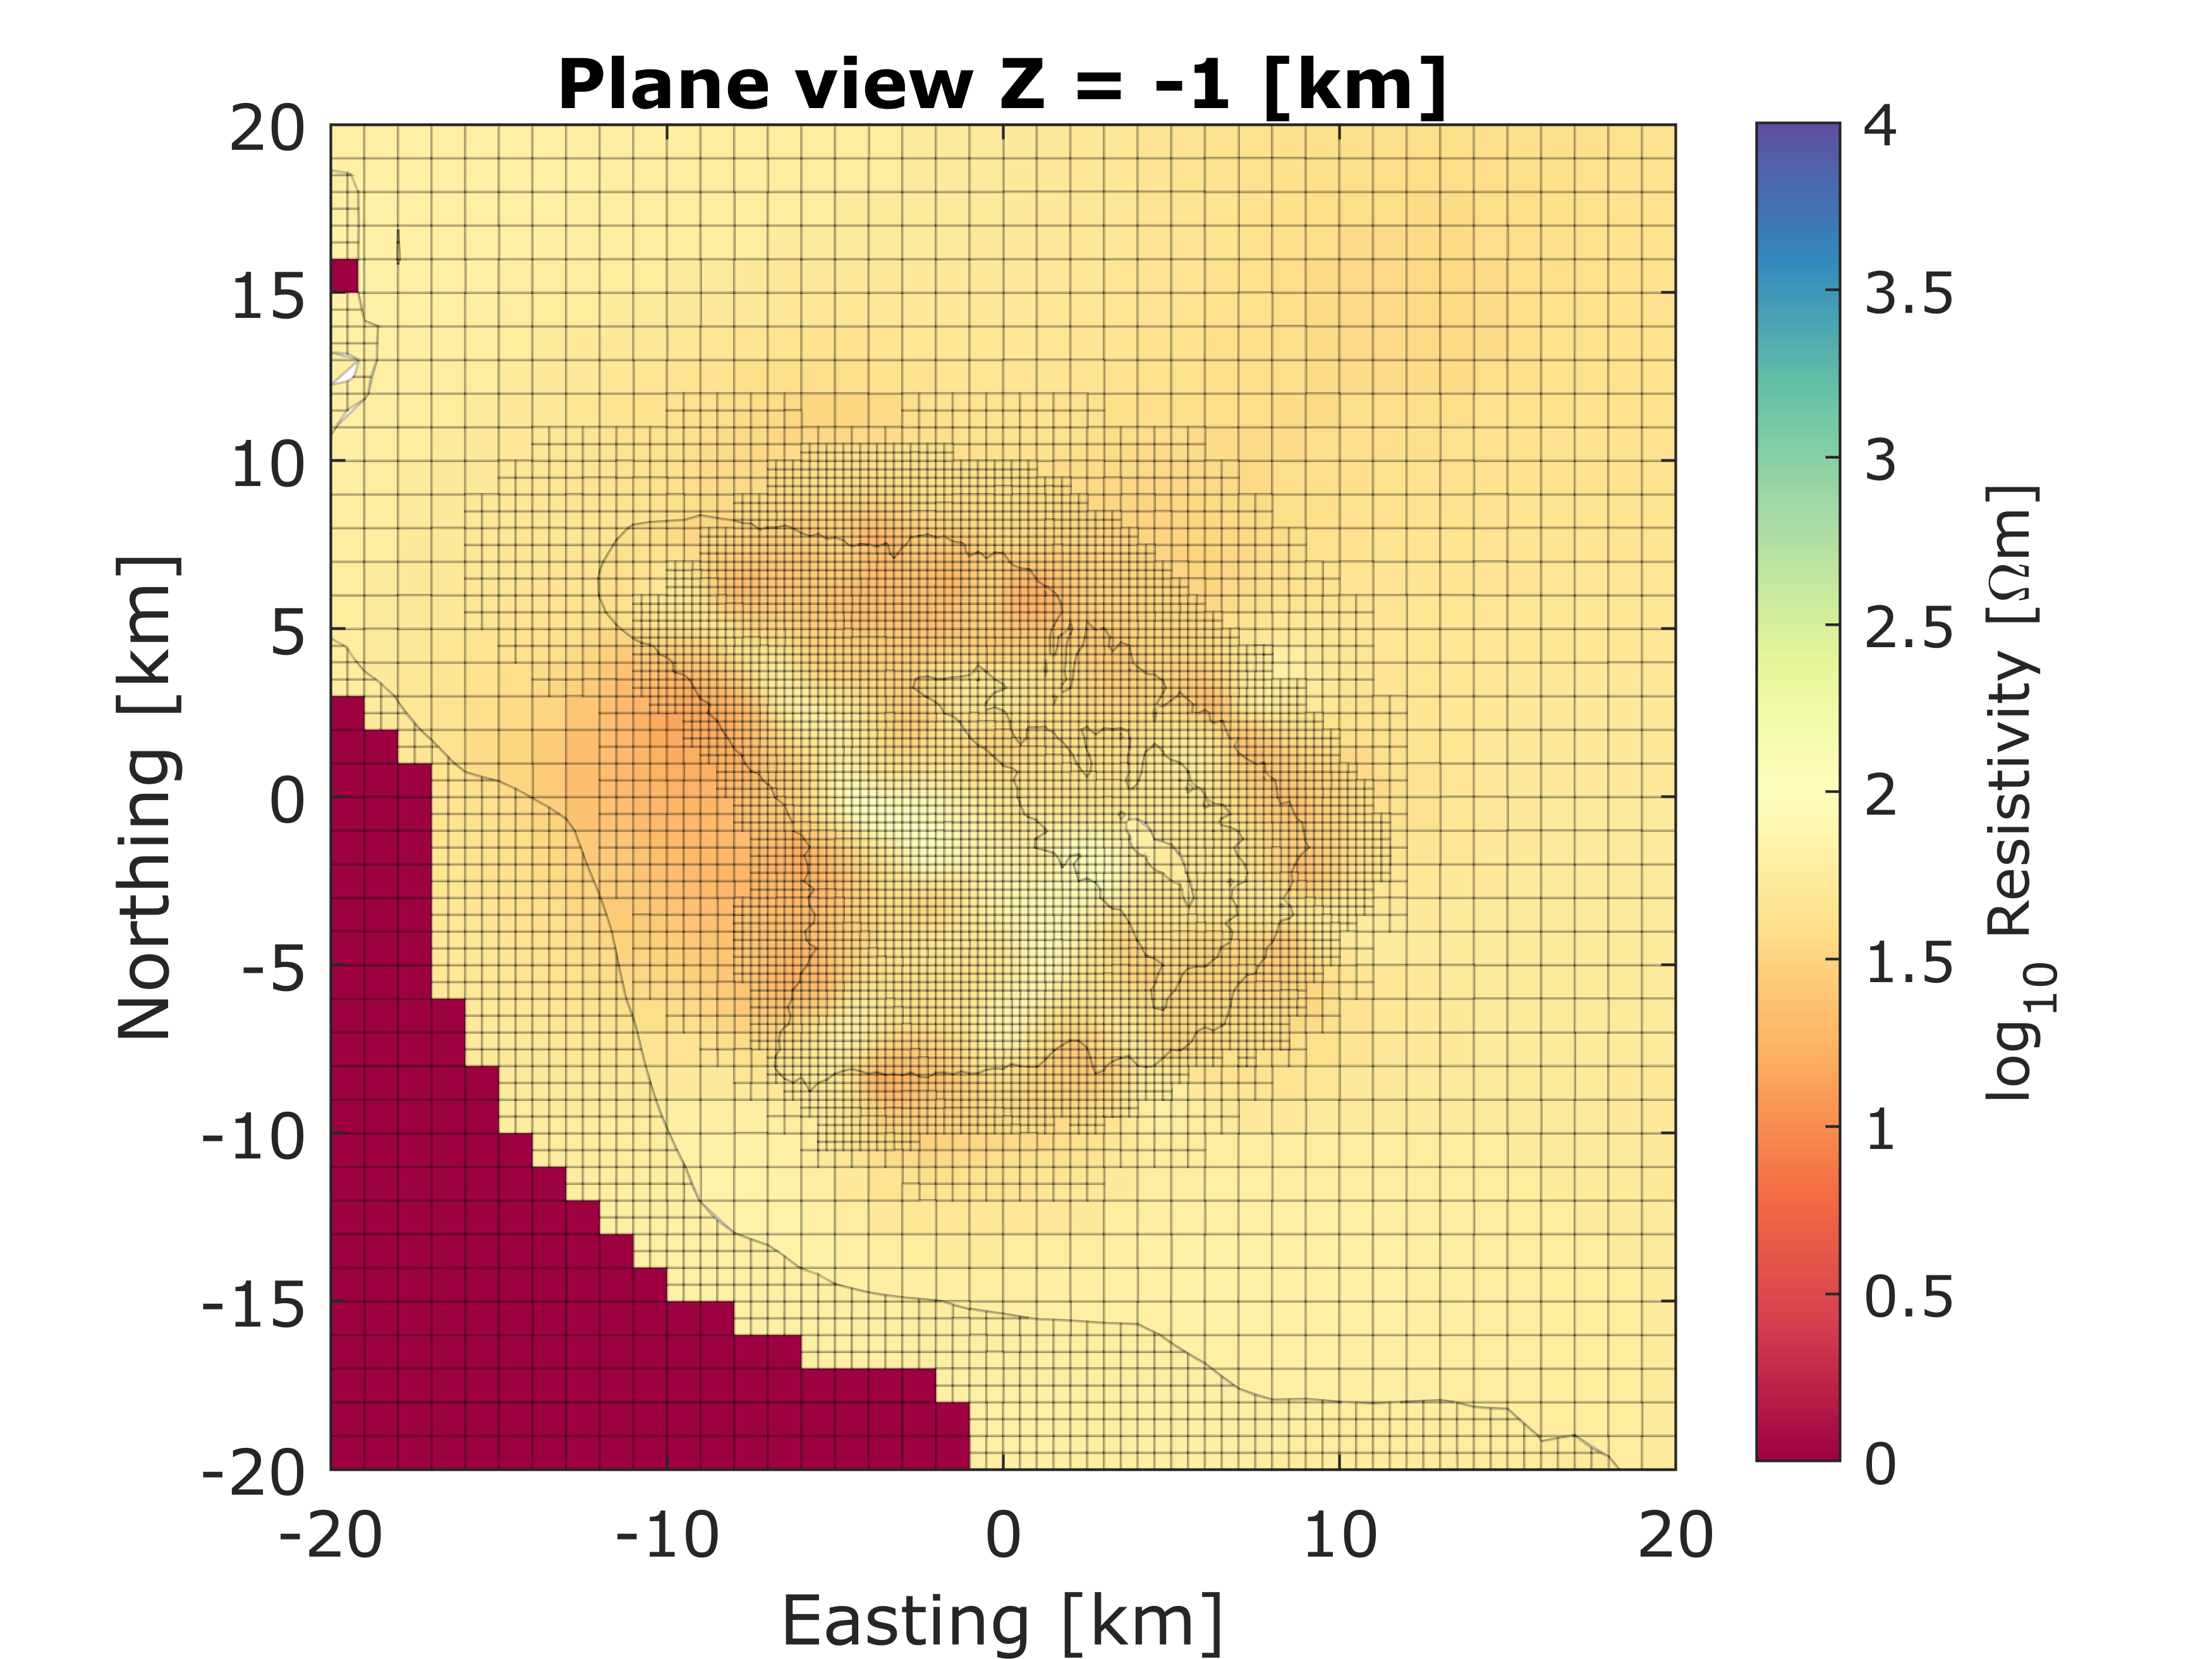

In [9]:
% 1) Plot
ax3 = plot_cross_section(M, 'z', -1);

% 2) Adjust view limits
ax3.XLim = [-20 20];
ax3.YLim = [-20 20];

% 3) Light mesh styling (edges)
h3 = findobj(ax3, 'Type', 'patch');
set(h3, 'EdgeColor', [0 0 0], 'EdgeAlpha', 0.2, 'LineWidth', 0.5);

% 4) Adjust color scale (log10)
clim(ax3, cLim);

## Example 4: Make air/ocean transparent (based on Example 1)

GOAL: Reuse the axis from Example 1 and hide air and ocean cells.


STEPS

1.  Find patches on the existing axis.
2. Lightly show edges.
3. Set air/ocean polygons transparent.
4. Set a neutral background.


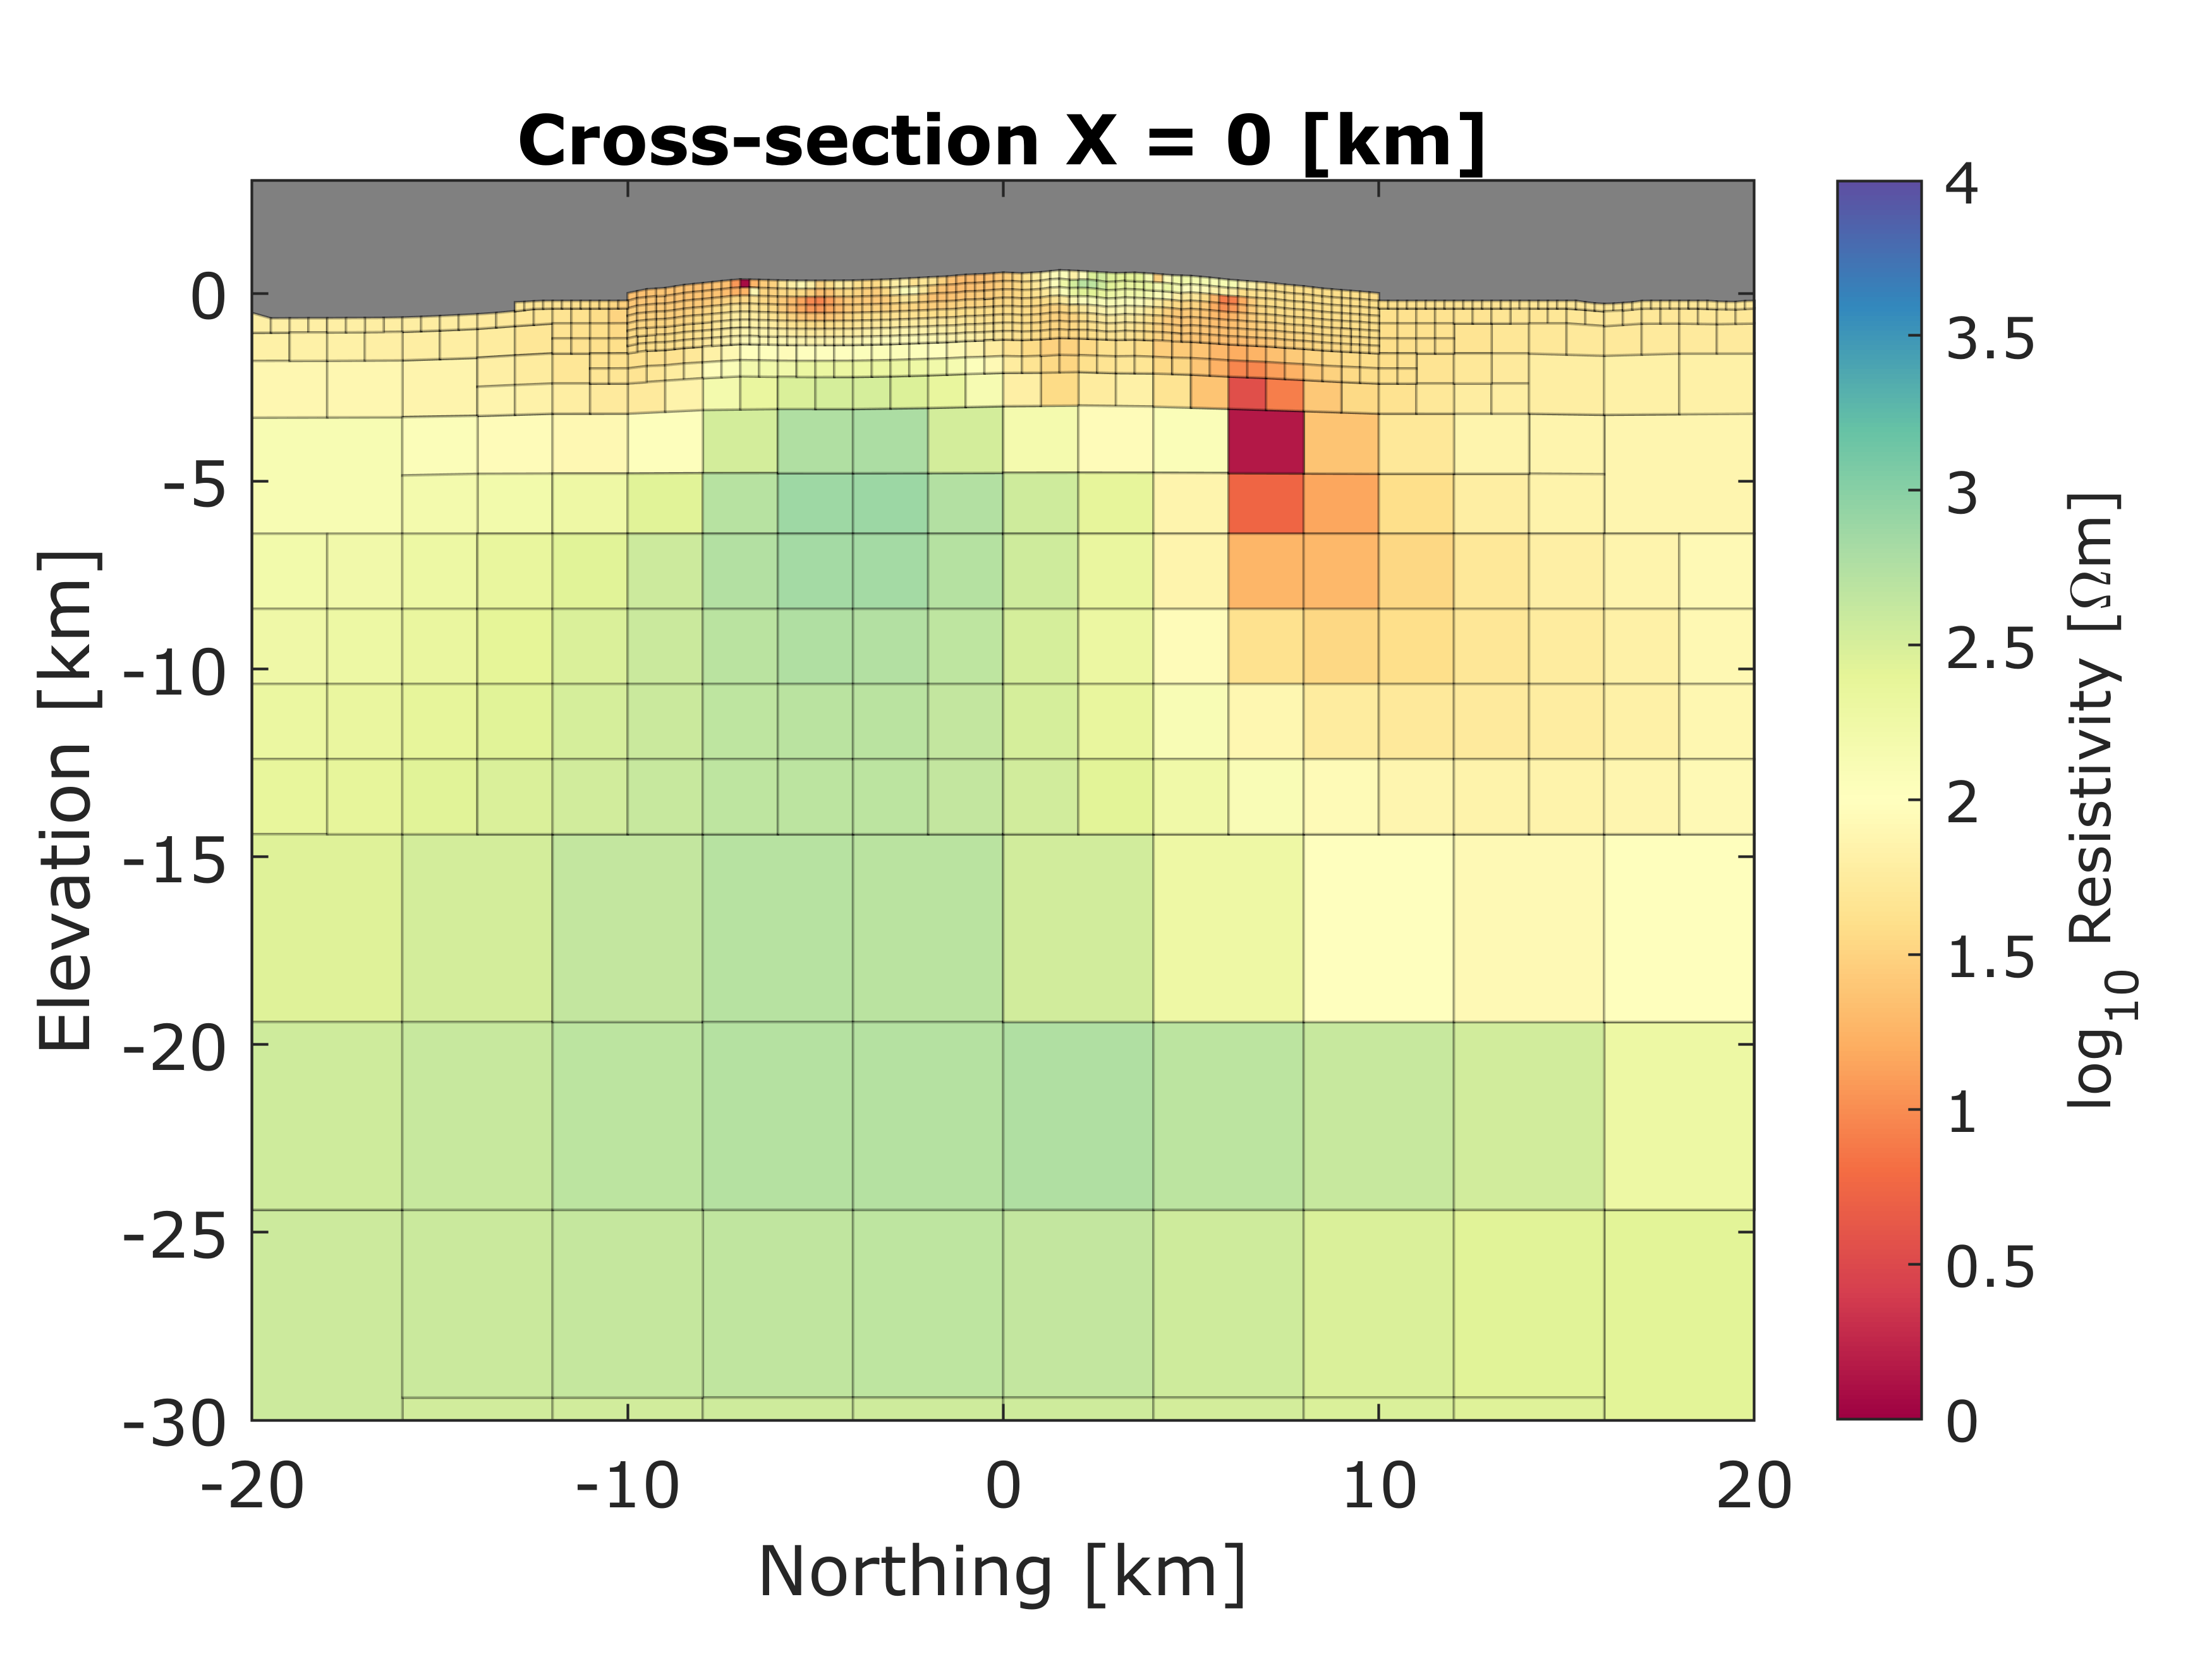

In [10]:
% 1) Find patches from Example 1 axis
h1 = findobj(ax1, 'Type', 'patch');

% 2) Light mesh edges
set(h1, 'EdgeColor', [0 0 0], 'EdgeAlpha', 0.25, 'LineWidth', 0.5);

% 3) Make air and ocean transparent (log10 resistivity)
for i = 1:numel(h1)
    if h1(i).CData(1) >= log10(air) || h1(i).CData(1) <= log10(ocean)
        h1(i).FaceAlpha = 0;
        h1(i).LineStyle = 'none';
    end
end

% 4) Background
ax1.Color = bgGray;

## Example 5: 2D resistivity profile between points A and B

GOAL: Extract a vertical profile defined by two map coordinates A and B.


STEPS:

1.  Define A and B.
2. Plot the A\-B profile.
3. Adjust depth limits.
4. Light mesh edges.
5. Make air/ocean transparent.
6. Adjust color limits.
7. Edit the colorscale.


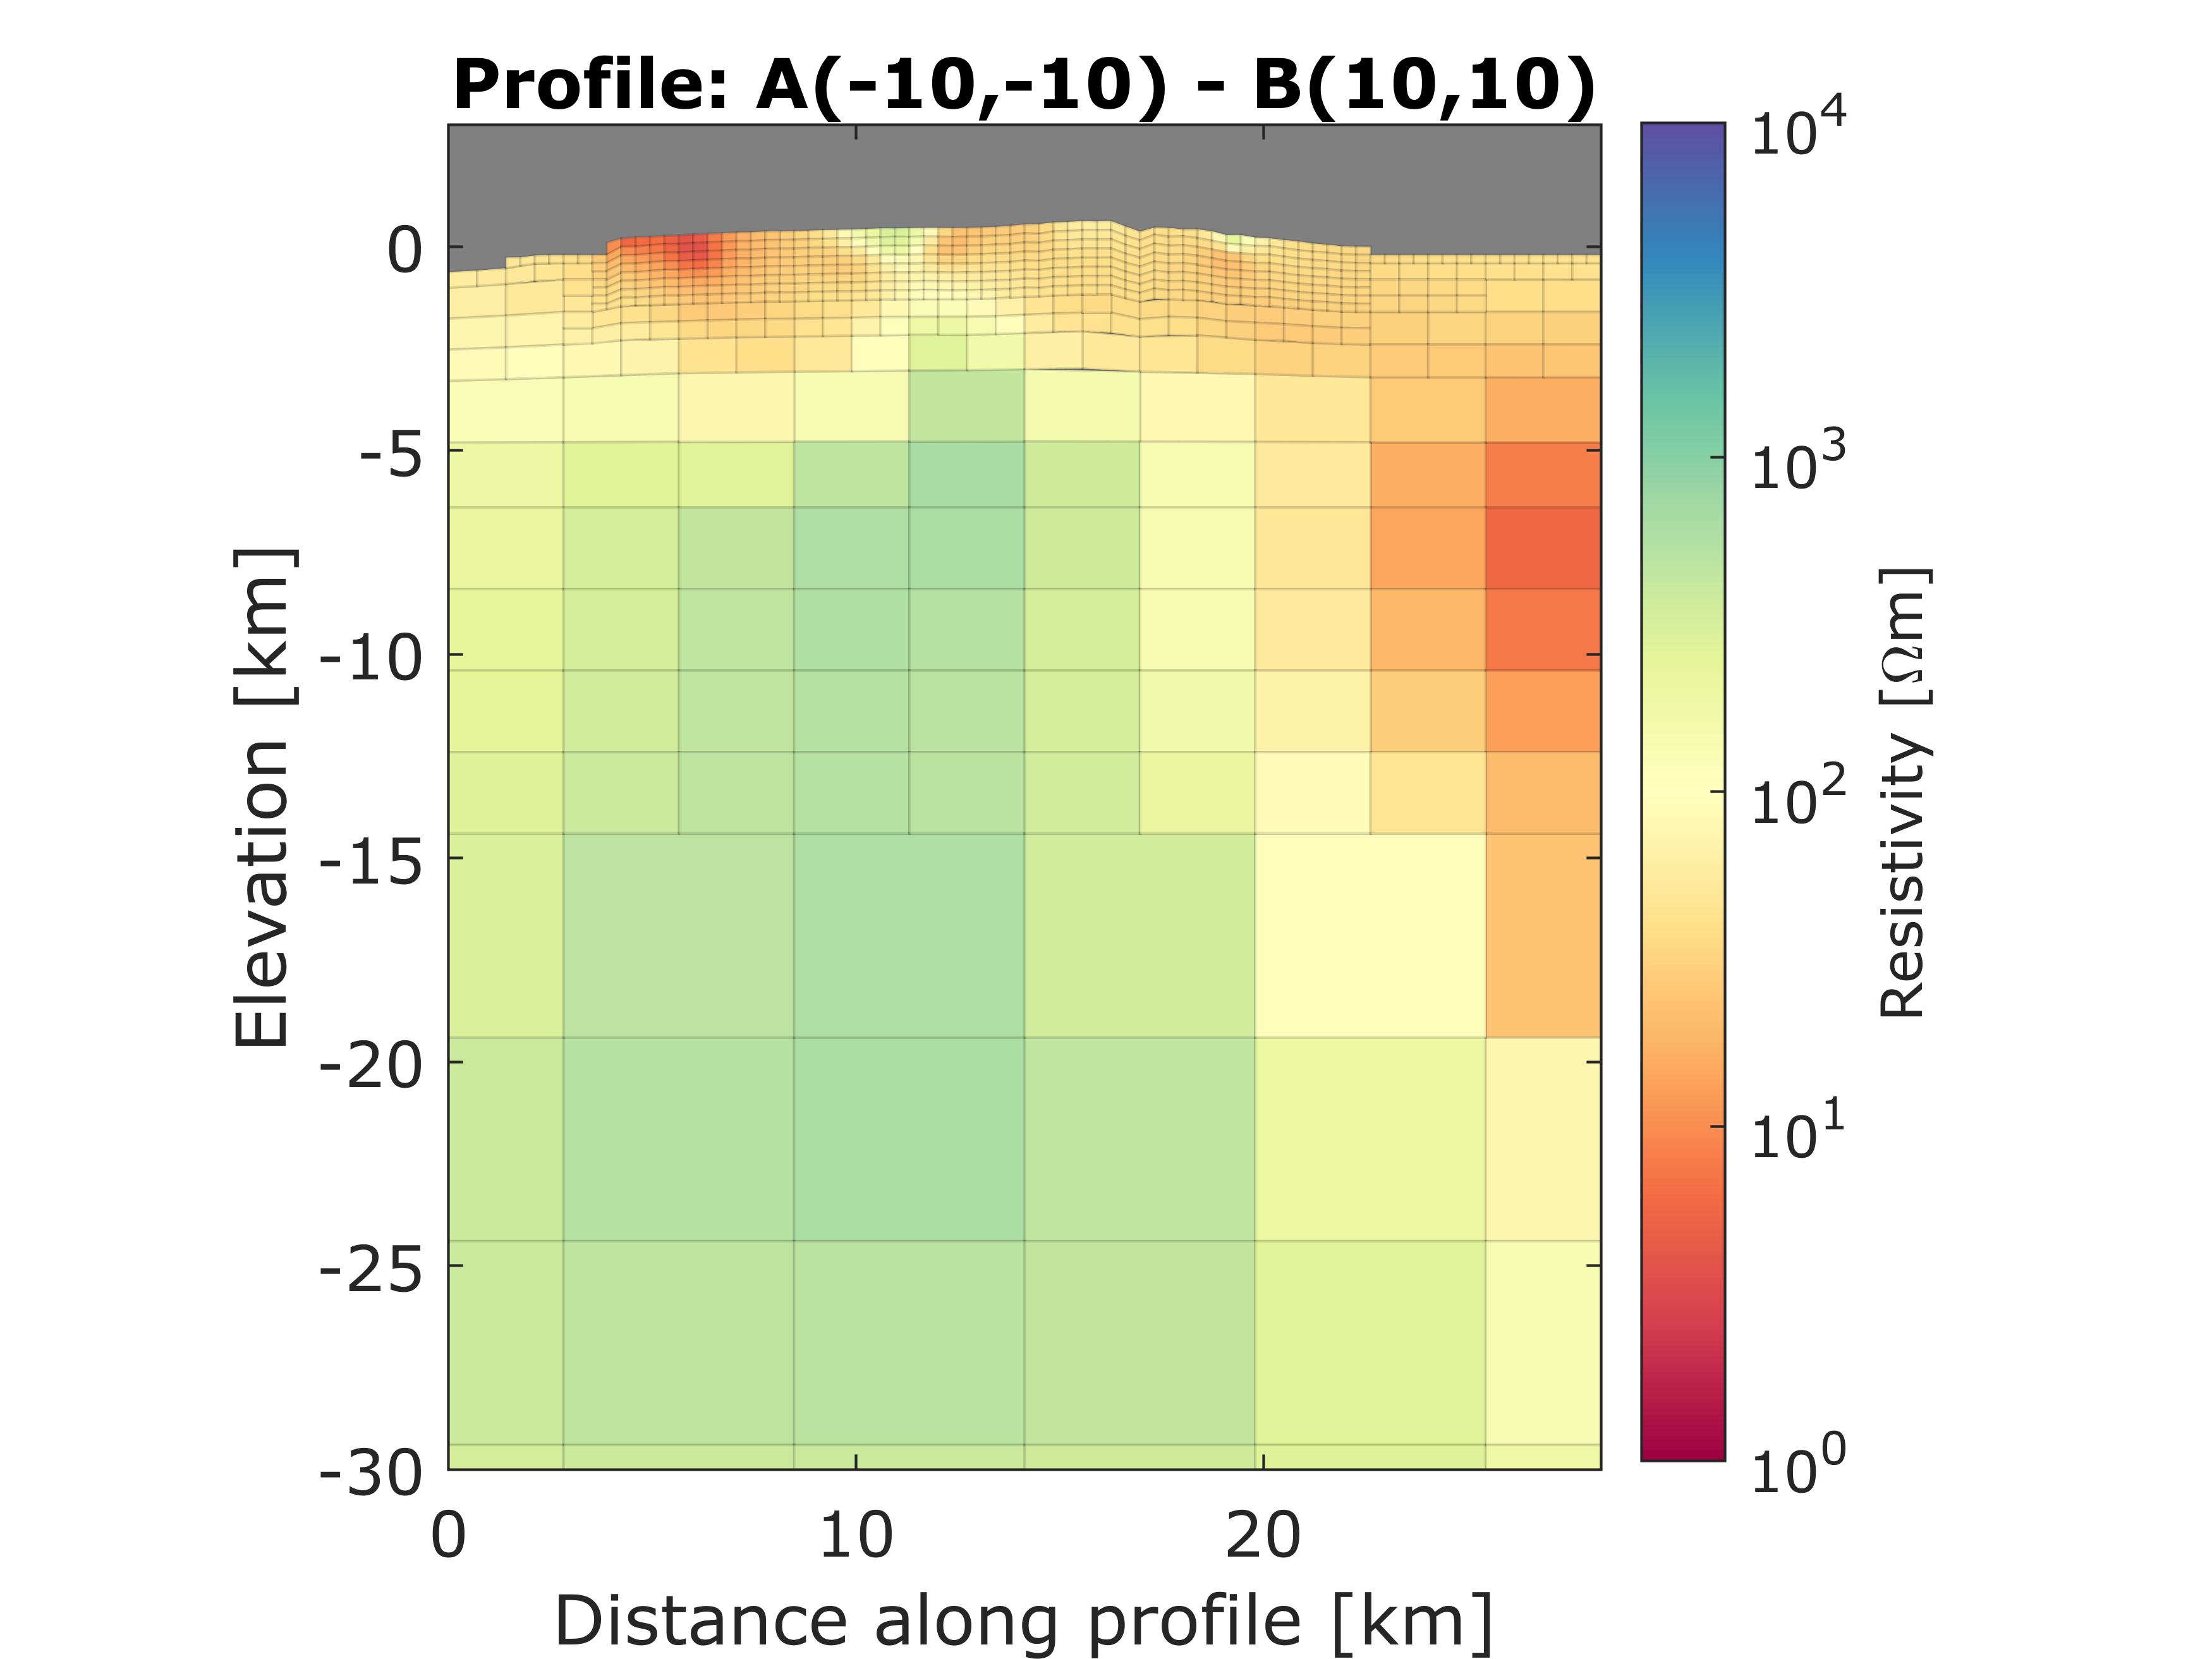

In [11]:
% 1) Define point coordinates in km
%     x     y
A = [-10, -10];
B = [ 10,  10];

% 2) Plot cross-section between A and B
ax4 = plot_cross_section(M, 'point', [A; B]);

% 3) Adjust depth/elevation limits
ax4.YLim = [-30 3];

% 4) Light mesh edges
h4 = findobj(ax4, 'Type', 'patch');
set(h4, 'EdgeColor', [0 0 0], 'EdgeAlpha', 0.1, 'LineWidth', 0.5);

% 5) Make air and ocean transparent
for i = 1:numel(h4)
    if h4(i).CData(1) >= log10(air) || h4(i).CData(1) <= log10(ocean)
        h4(i).FaceAlpha = 0;
        h4(i).LineStyle = 'none';
    end
end

% 6) Adjust color scale (log10)
clim(ax4, cLim);

% 7) Small editions to colorbar
cb = colorbar(ax4);
cb.Ticks = unique(round(cb.Ticks));
for i = 1:numel(cb.Ticks)
    cb.TickLabels{i} = ['10^{', num2str(cb.Ticks(i)), '}'];
end
cb.Label.String = 'Resistivity [\Omegam]';

% Optional background
ax4.Color = bgGray;